# compare On-Off Beam BNB data to MC-BNB/DATA cosmic overlay in which the cosmic are reweighted
This is done by:
1. Scaling the OffBeam to the OnBeam exposure time
2. scaling the Overlay by the number of POT in the BeamOn
3. increasing the number of cosmic pairs in the Overlay to match the Beam On-Off in the preselection stage

and then studying what happens to the On-Off/overlay comparison after all cuts

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8_v9',
    'date': '2018_04_28'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.480008207788 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/overlay_morecosmic_vs_BeamOn-Off/'

In [3]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_04_'+versions['date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_05_'+versions['date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print_and_say("%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume')

OffBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_04_'+versions['date']+'_vertices.csv')
                     ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_05_'+versions['date']+'_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print_and_say("%d"%len(OffBeam)+' pairs from Off-Beam, %d'%len(OffBeamFV)+' in Fiducial Volume')

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

38199 pairs from On-Beam, 24345 in Fiducial Volume
34730 pairs from Off-Beam, 21107 in Fiducial Volume
28935 pairs from MC-BNB + cosmic DATA overlay
19125 pairs in FV
5069 are 1mu-1p, 26.5%
4364 are other pairs, 22.8%
9692 are cosmic, 50.7%
--------------------------------------------------------------
2404 are CC 1p 0pi, 12.6%
9692 cosmic pairs and 5069 mu-p pairs in overlay


In [4]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,do_PIDaCali=True
                                                                   ,cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
PIDa,65.4%,54.1%,68.1%,26.7%,PIDa,65.4% (3316),34.6% (1511),13.4% (1301),68.1% (1637)
flash,61.3%,59.7%,63.6%,29.4%,flash,61.3% (3106),33.8% (1474),6.5% (626),63.6% (1530)
length,54.7%,68.0%,57.8%,34.1%,length,54.7% (2771),20.1% (875),4.4% (429),57.8% (1389)
vertex activity,37.5%,70.3%,50.2%,44.6%,vertex activity,37.5% (1902),12.9% (565),2.4% (237),50.2% (1206)
delta phi,24.4%,81.4%,38.1%,60.4%,delta phi,24.4% (1236),3.1% (136),1.5% (146),38.1% (917)
soft Pt,20.9%,88.3%,34.4%,68.8%,soft Pt,20.9% (1061),2.0% (87),0.6% (54),34.4% (827)


# overlay subsamples-scaling

In [5]:
f_OverlayCosmic=1.45 # by which factor should we increase the cosmic part in the overlay
overlay_scalings = dict()
overlay_scalings['only POT'] = get_samples_scaling( N_total='MC(tot) x POT' 
                                                   , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic] = get_samples_scaling( N_total='MC(tot) x POT' 
                                                                                       , f_OverlayCosmic=f_OverlayCosmic  # by which factor should we increase the cosmic part in the overlay                                                                         
                                                                                       , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'POT & f(Overlay-Cosmic)=1.45': {   '1mu-1p': 0.48000820778826886,
                                        'CC 1p 0pi': 0.48000820778826886,
                                        'cosmic': 0.7151816993464052,
                                        'other pairs': 0.4800082077882688},
    'only POT': {   '1mu-1p': 0.48000820778826886,
                    'CC 1p 0pi': 0.48000820778826886,
                    'cosmic': 0.4800082077882688,
                    'other pairs': 0.4800082077882688}}


## collinearity

In [38]:
cuts_order  = ['no cut','flash','length','vertex activity','delta phi','soft Pt'] #,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] #,'PIDa cut'

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


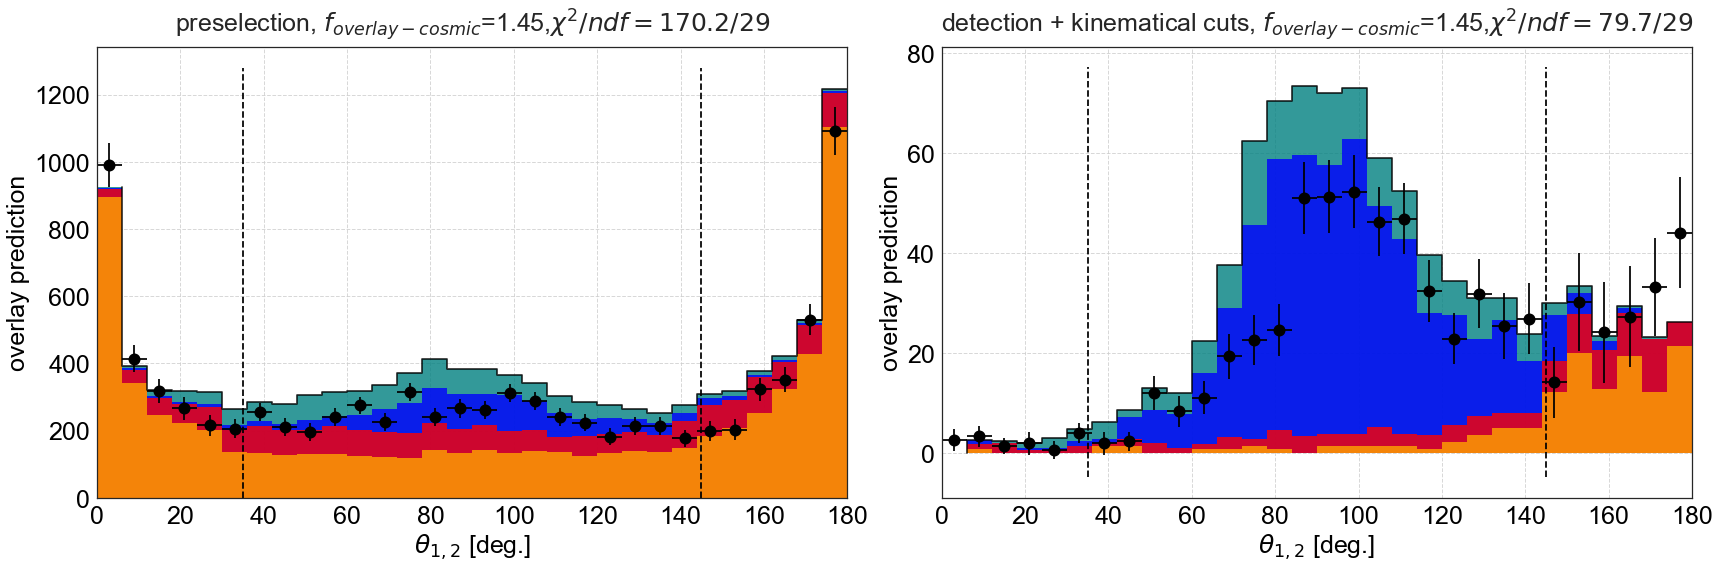

In [45]:
plot_OnOff_nocut_finalcut(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                          ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                          ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay                          
                          ,xlim=(0,180),chi2_xrange=(0,180),x_varcut=(35,145),debug=0
                   );

## $l_\mu - l_p$

In [46]:
cuts_order  = ['no cut','flash','non-collinearity','vertex activity','delta phi','soft Pt'] #,'PIDa'
cuts_labels = ['preselection','PMT cuts','collinearity cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] #,'PIDa cut'

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


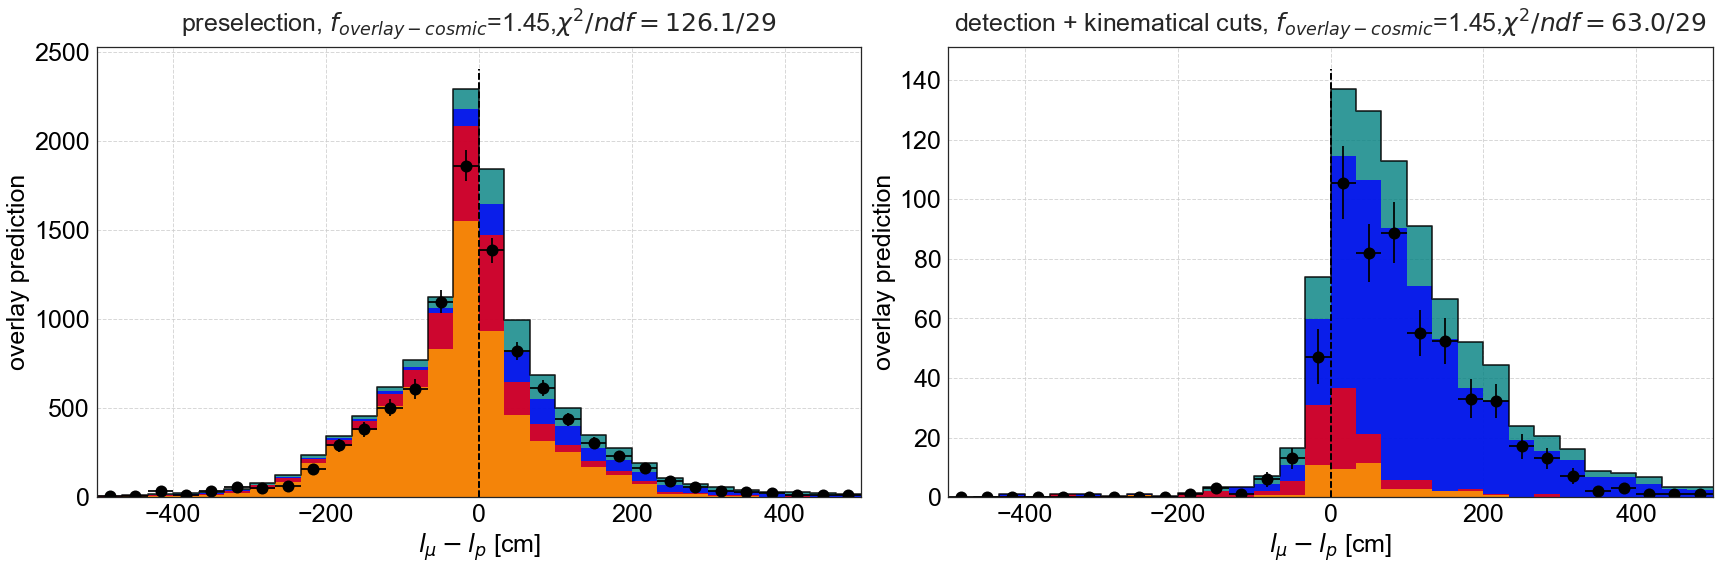

In [47]:
plot_OnOff_nocut_finalcut(var='l_mu-l_p',x_label= r'$l_{\mu}-l_p$ [cm]',bins=linspace(-500,500,31)
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,xlim=(-500,500),chi2_xrange=(-200,500),debug=0,x_varcut=(0,0)
                   );

## $\Delta \phi$

In [48]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','soft Pt']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


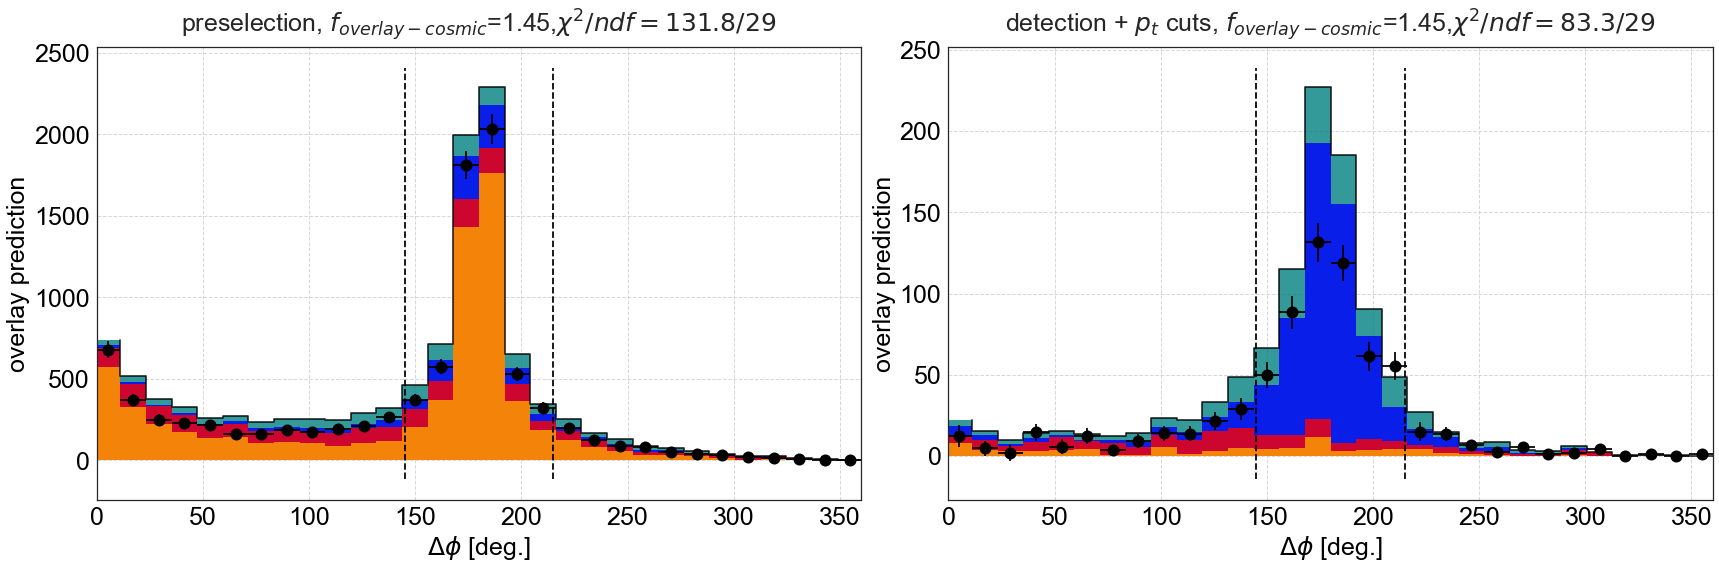

In [50]:
plot_OnOff_nocut_finalcut(var='delta_phi',x_label=  r'$\Delta \phi$ [deg.]',bins=linspace(-1,361,31),x_varcut=(145,215)
                    ,last_cut_name='soft Pt',last_cut_label='detection + $p_t$ cuts'
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,xlim=(0,360),chi2_xrange=(0,360)
                   );

## number of PE in closest flash

In [51]:
cuts_order  = ['no cut','length','non-collinearity','vertex activity','delta phi','soft Pt']#,'PIDa'
cuts_labels = ['preselection',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


In [52]:
OverlaySamples_noFlash = dict()
for pair_type in pair_types:
    OverlaySamples_noFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']<0]
    
reducedOverlay_noFlash,pureffOverlay_noFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_noFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for no-flash'

OnBeamFV_noFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']<0]
OffBeamFV_noFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']<0]
reducedOnBeam_noFlash,reducedOffBeam_noFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_noFlash
                                                    ,OffBeamFV=OffBeamFV_noFlash,cuts_order=cuts_order)
print 'done applying cuts to data for no-flash'


OverlaySamples_withFlash = dict()
for pair_type in pair_types:
    OverlaySamples_withFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']>=0]
    
reducedOverlay_withFlash,pureffOverlay_withFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_withFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for with-flashes'

OnBeamFV_withFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']>=0]
OffBeamFV_withFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']>=0]
reducedOnBeam_withFlash,reducedOffBeam_withFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_withFlash
                                                    ,OffBeamFV=OffBeamFV_withFlash,cuts_order=cuts_order)
print 'done applying cuts to data for with-flashes'

done applying cuts to overlay for no-flash
done applying cuts to data for no-flash
done applying cuts to overlay for with-flashes
done applying cuts to data for with-flashes


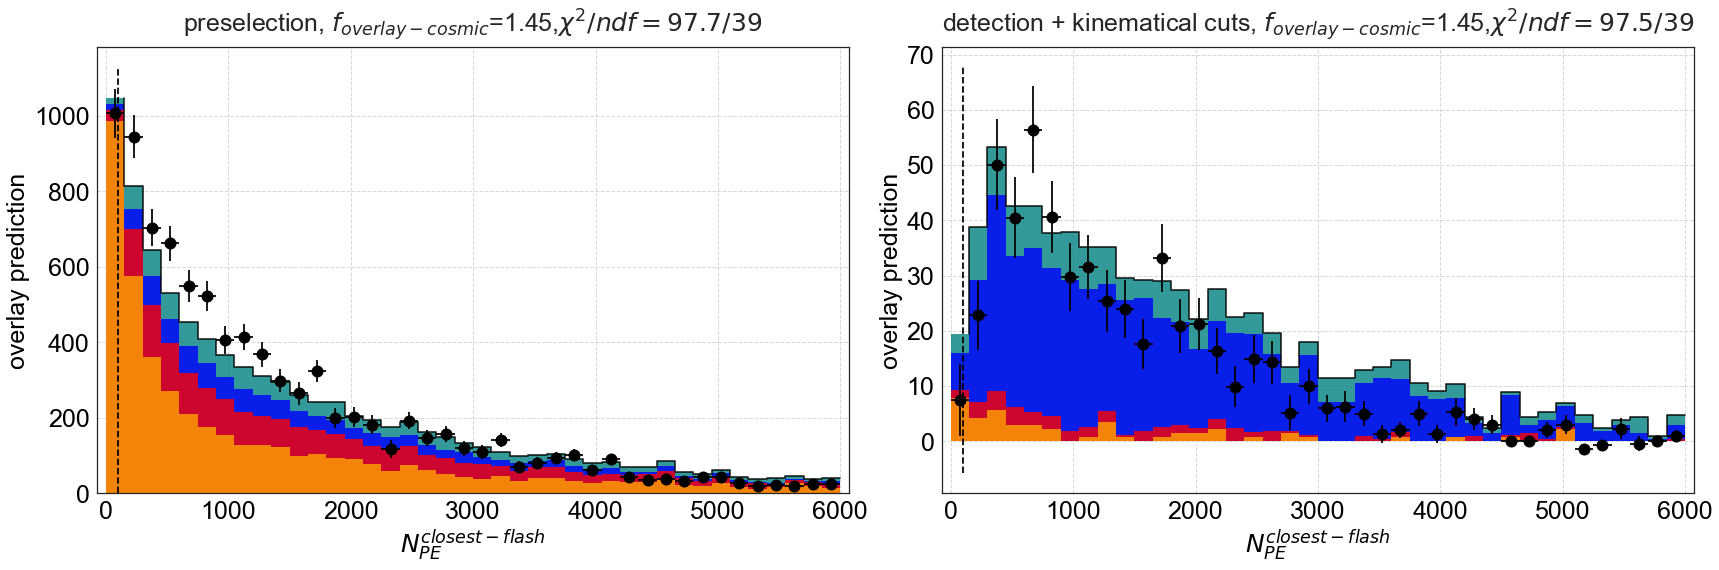

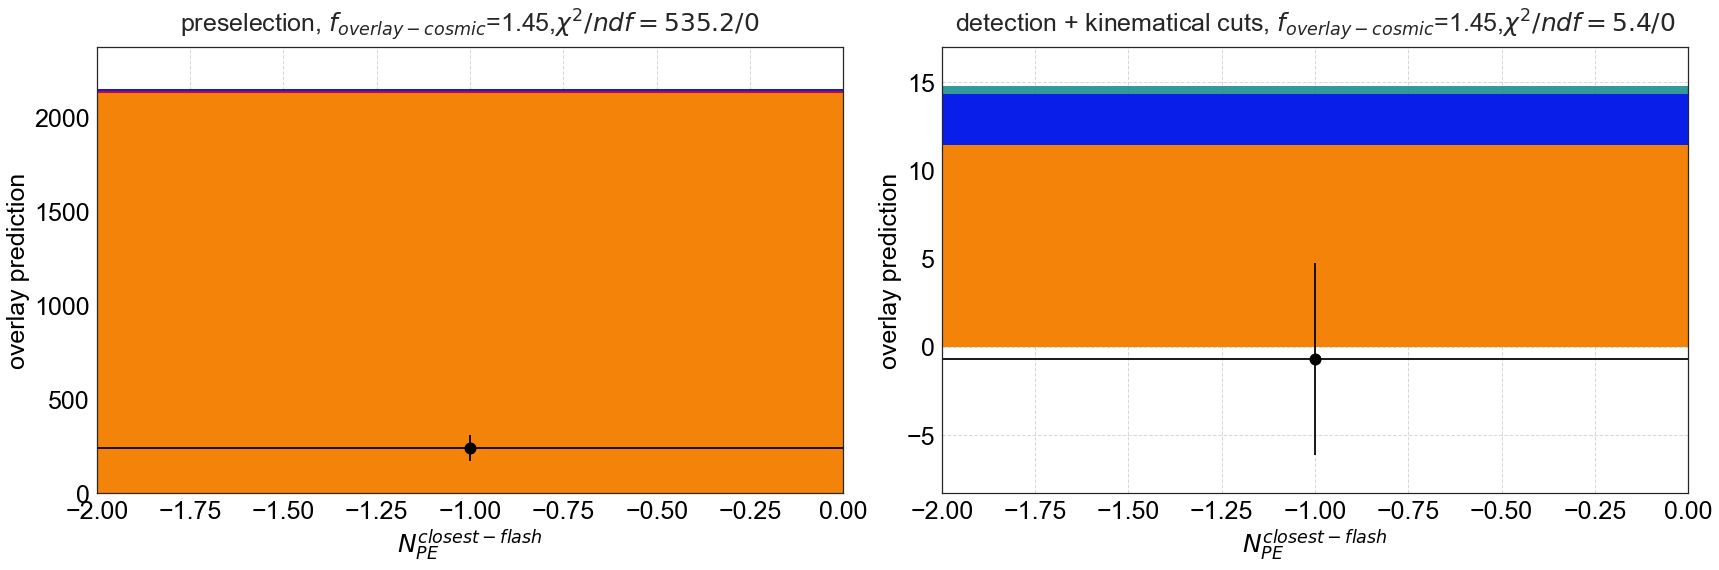

In [56]:
plot_OnOff_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-1,6000,41)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam_withFlash
                    ,reducedOnBeam=reducedOnBeam_withFlash
                    ,reducedOverlay=reducedOverlay_withFlash
                          ,x_ticks = [0,500,1000,1500]
#                     ,xlim=(0,4500)
                    ,chi2_xrange=(0,4500)
                    ,debug=0
                   );

plot_OnOff_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-2,0,2)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam_noFlash
                    ,reducedOnBeam=reducedOnBeam_noFlash
                    ,reducedOverlay=reducedOverlay_noFlash
                    ,x_ticks = [0,500,1000,1500]
                    ,chi2_xrange=(-2,0),xlim=(-2,0)
                    ,debug=0
                   );

## $p_t$

In [57]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


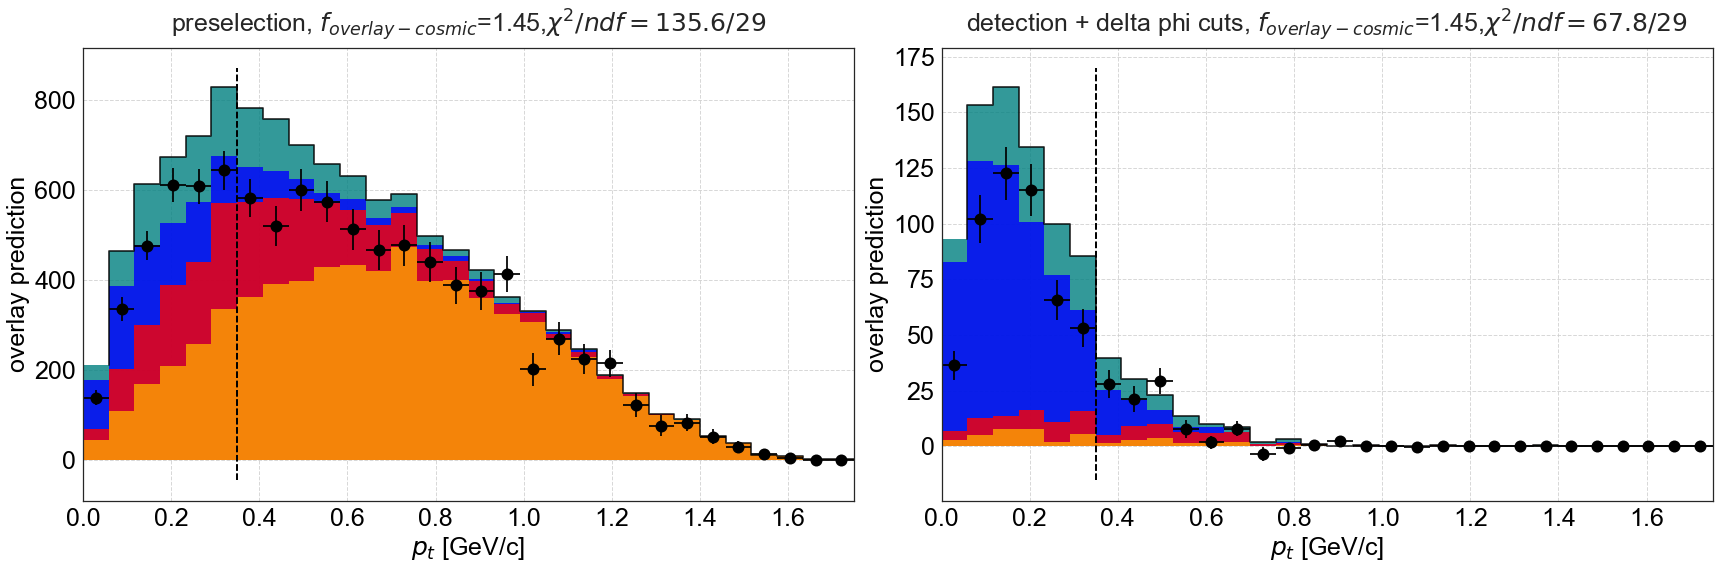

In [60]:
plot_OnOff_nocut_finalcut(var='reco_Pt',x_label=  r'$p_{t}$ [GeV/c]',bins=linspace(0,1.75,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='delta phi',last_cut_label='detection + delta phi cuts'
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,xlim=(0,1.75),chi2_xrange=(0,0.8)
                   );

## vertex activity

In [61]:
cuts_order  = ['no cut','flash','length','non-collinearity','delta phi','soft Pt']#,'PIDa'
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity', r'$\Delta \phi$ cut',r'$p_t$ cut']#,'PIDa cut'
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


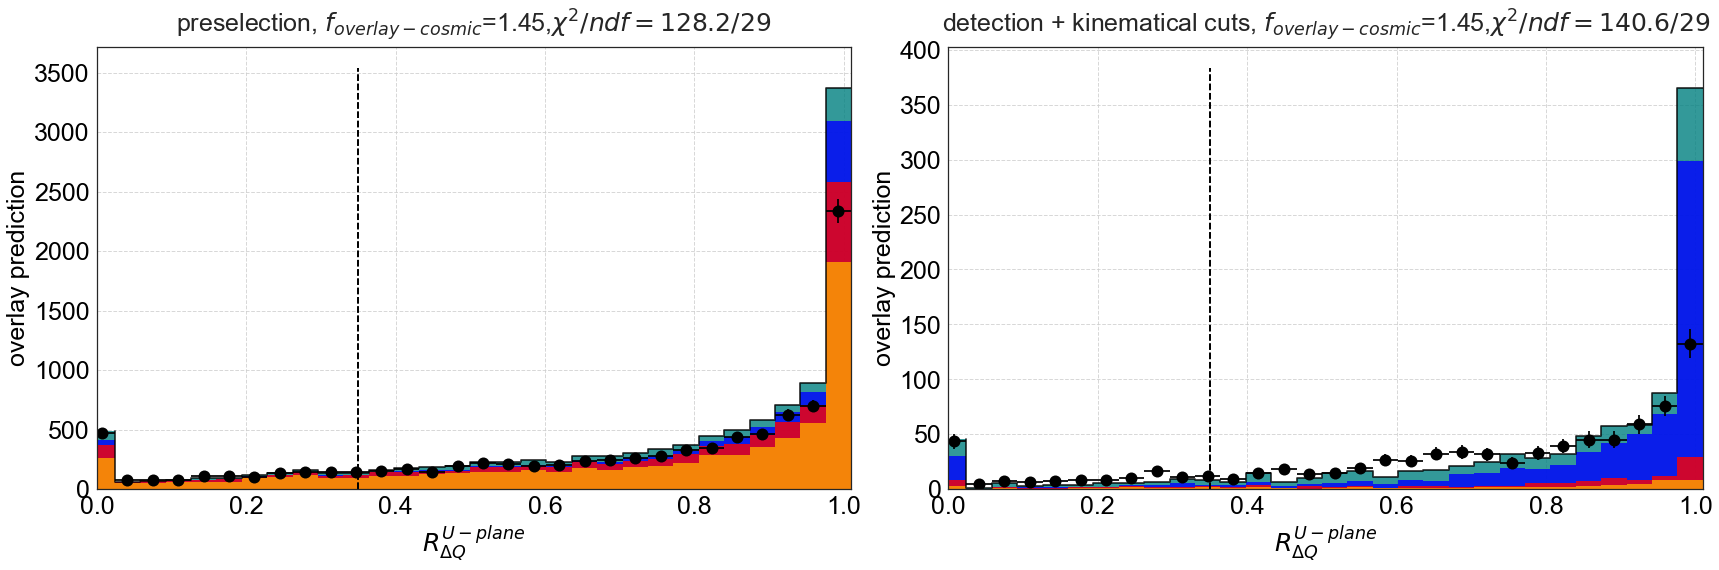

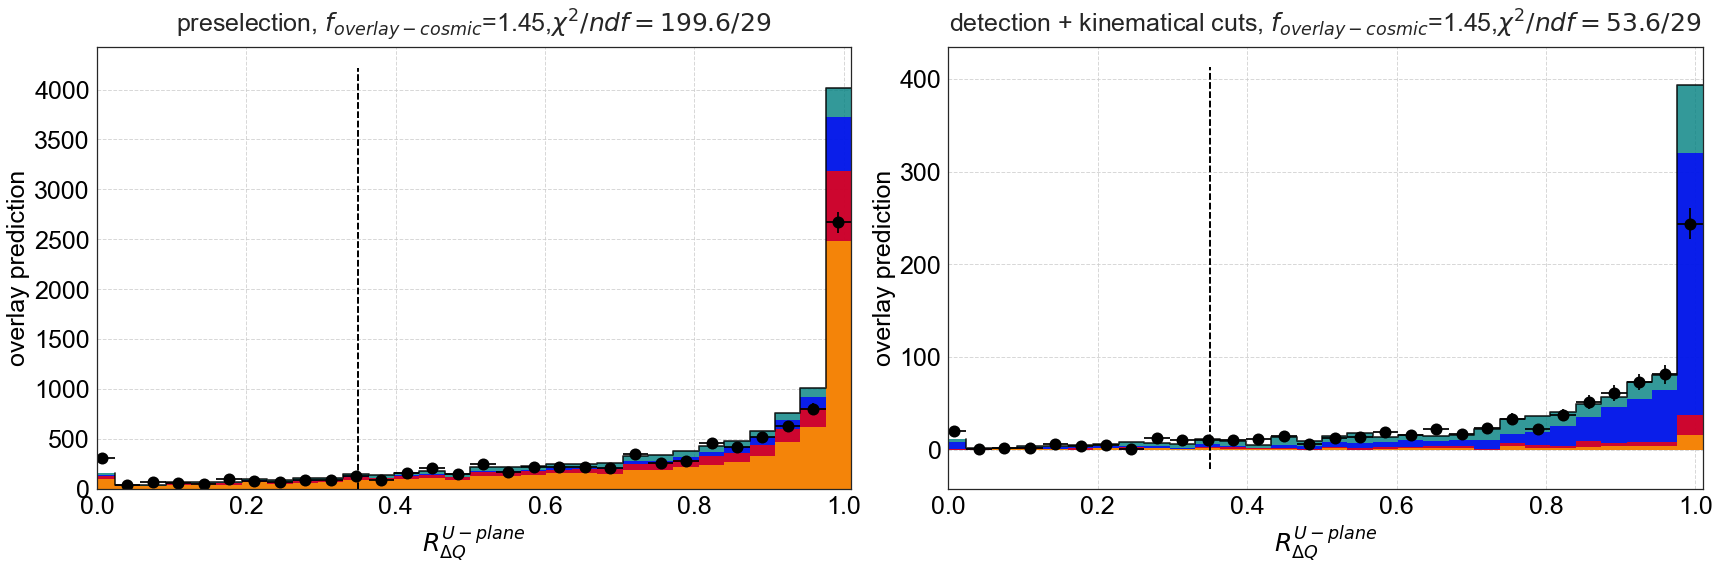

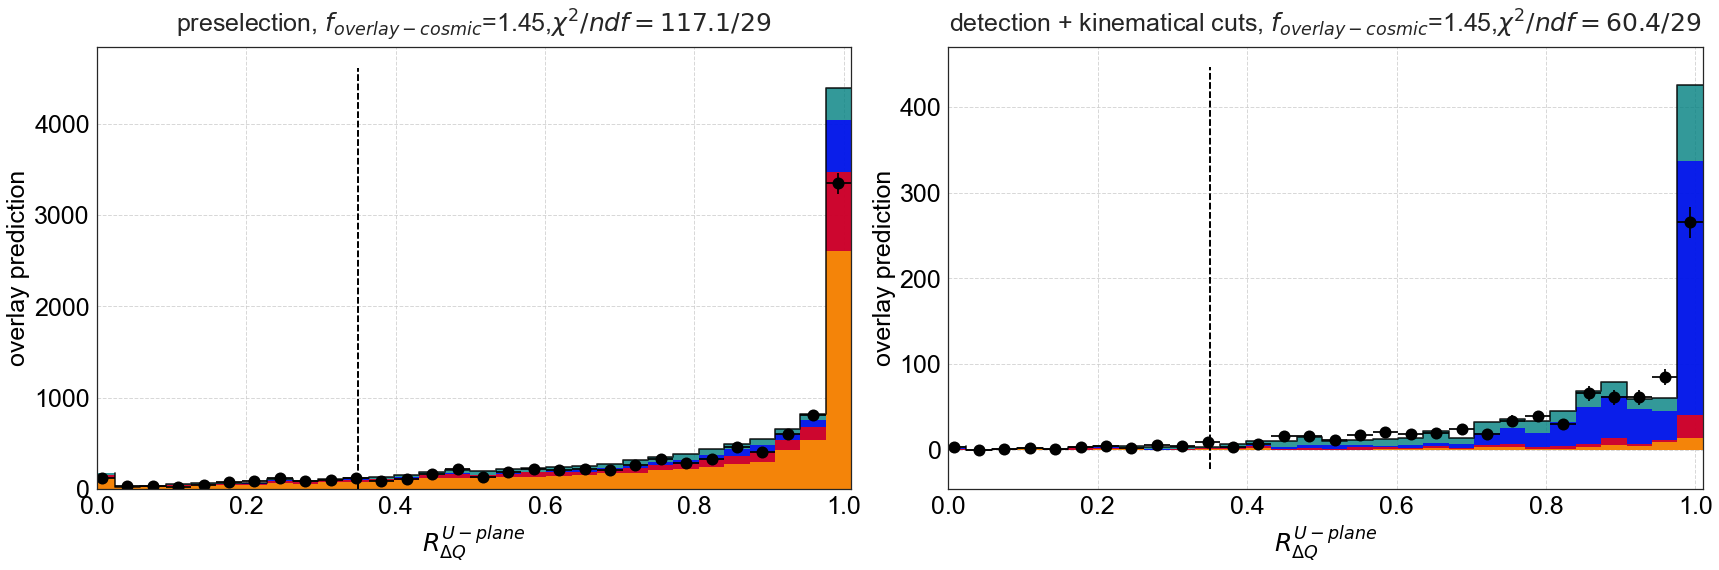

In [62]:
for plane in [0,1,2]:
    plot_OnOff_nocut_finalcut(var='RdQaroundVertex[plane %d][50 wires x 100 ticks]'%plane,x_label=  r'$R_{\Delta Q}^{U-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   );

## PIDa

In [6]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


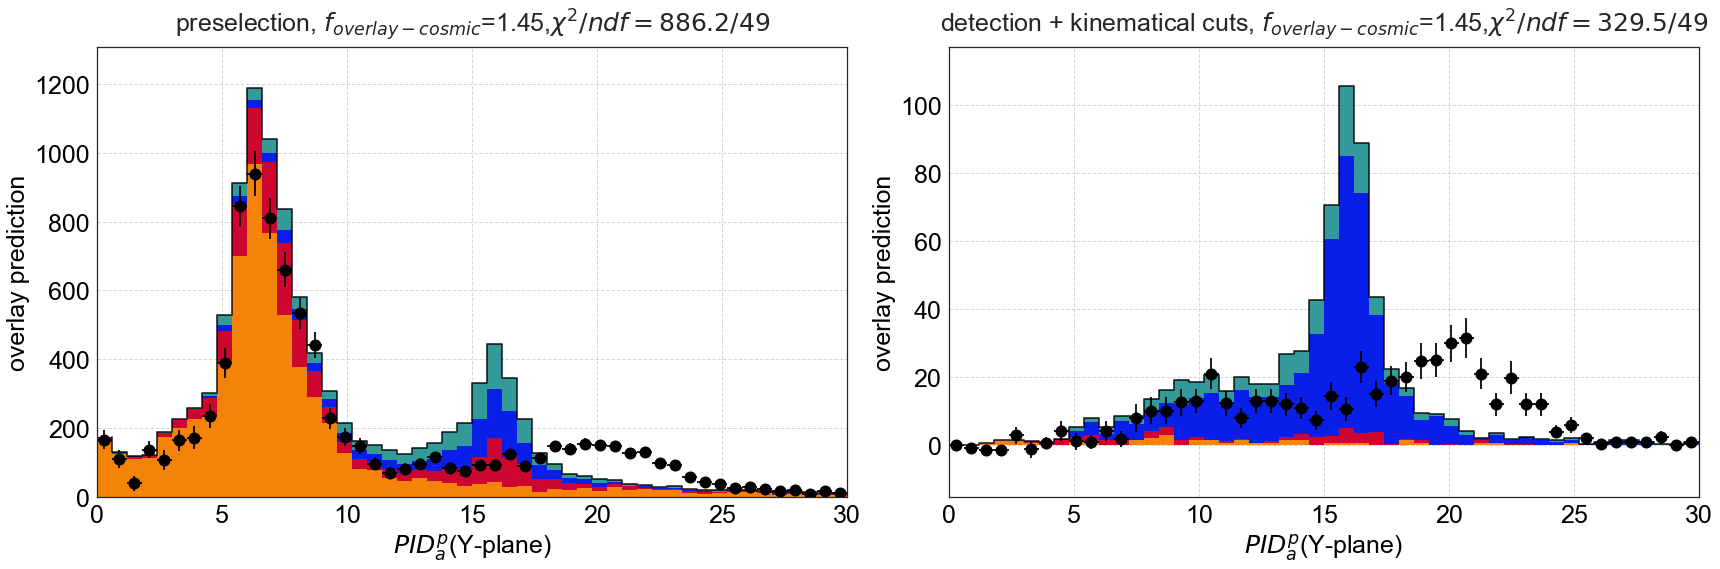

In [7]:
plot_OnOff_nocut_finalcut(var='pidcali_PIDaYplane_pCandidate'
                                       ,x_label= r'$PID_{a}^{p}$(Y-plane)',bins=linspace(0,30,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(0,30)
                                       ,chi2_xrange=(0,30));

# $\chi^2_{\mu}$, $\chi^2_{p}$

In [53]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


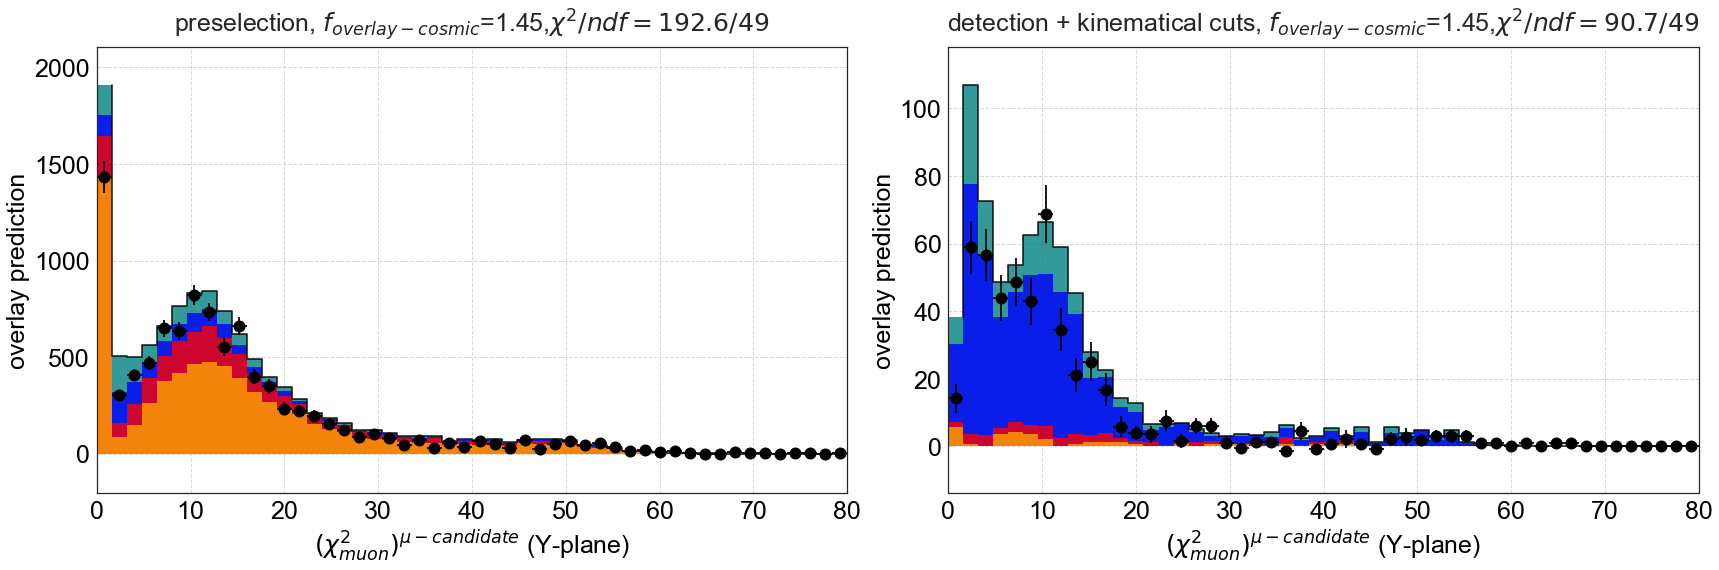

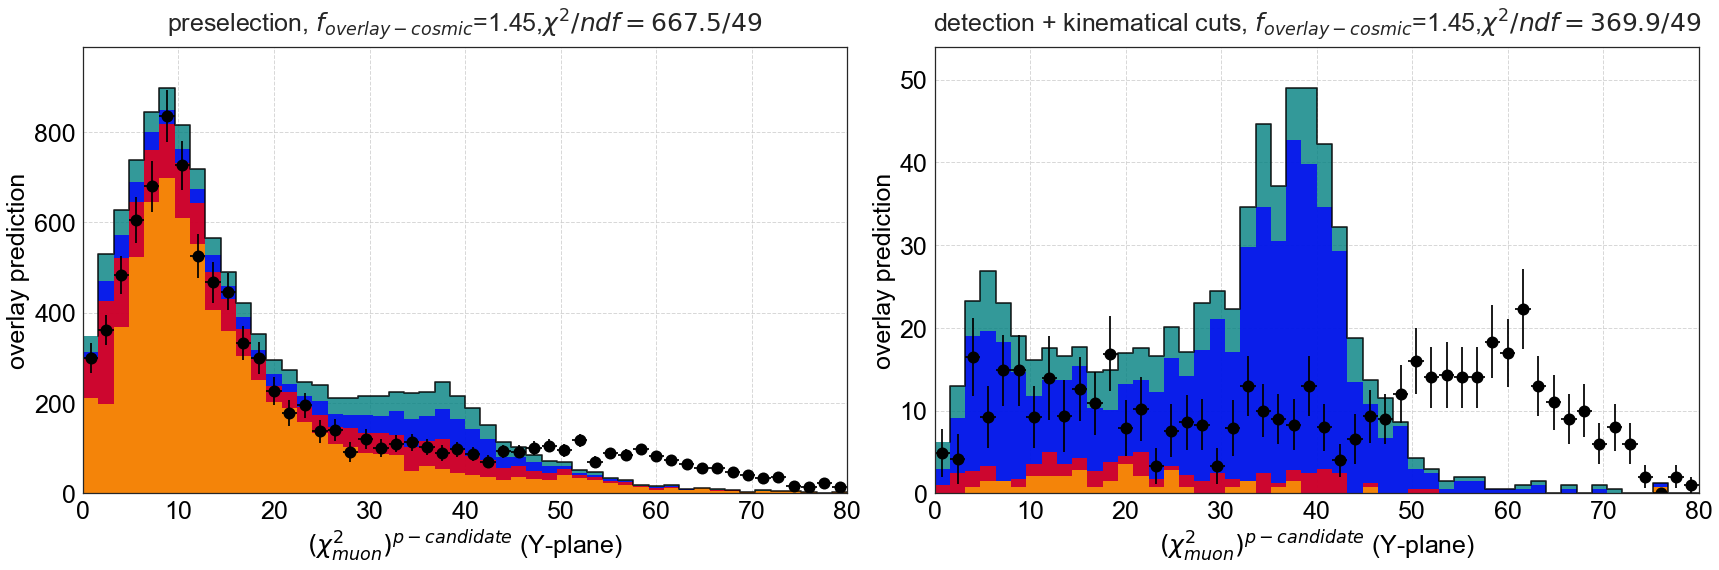

In [54]:
plot_OnOff_nocut_finalcut(var='pidcali_Chi2MuonYplane_muCandidate'
                                       ,x_label= r'$(\chi^2_{muon})^{\mu-candidate}$ (Y-plane)',bins=linspace(0,80,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(0,80)
                                       ,chi2_xrange=(0,80));

plot_OnOff_nocut_finalcut(var='pidcali_Chi2MuonYplane_pCandidate'
                                       ,x_label= r'$(\chi^2_{muon})^{p-candidate}$ (Y-plane)',bins=linspace(0,80,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(0,80)
                                       ,chi2_xrange=(0,80));

# 2d $\chi^2_{p}$ of the proton vs. the muon candidate

In [57]:
Chi2Proton_muCandidate_min=80
Chi2Proton_muCandidate_max=10000
Chi2Proton_pCandidate_min=0
Chi2Proton_pCandidate_max=60

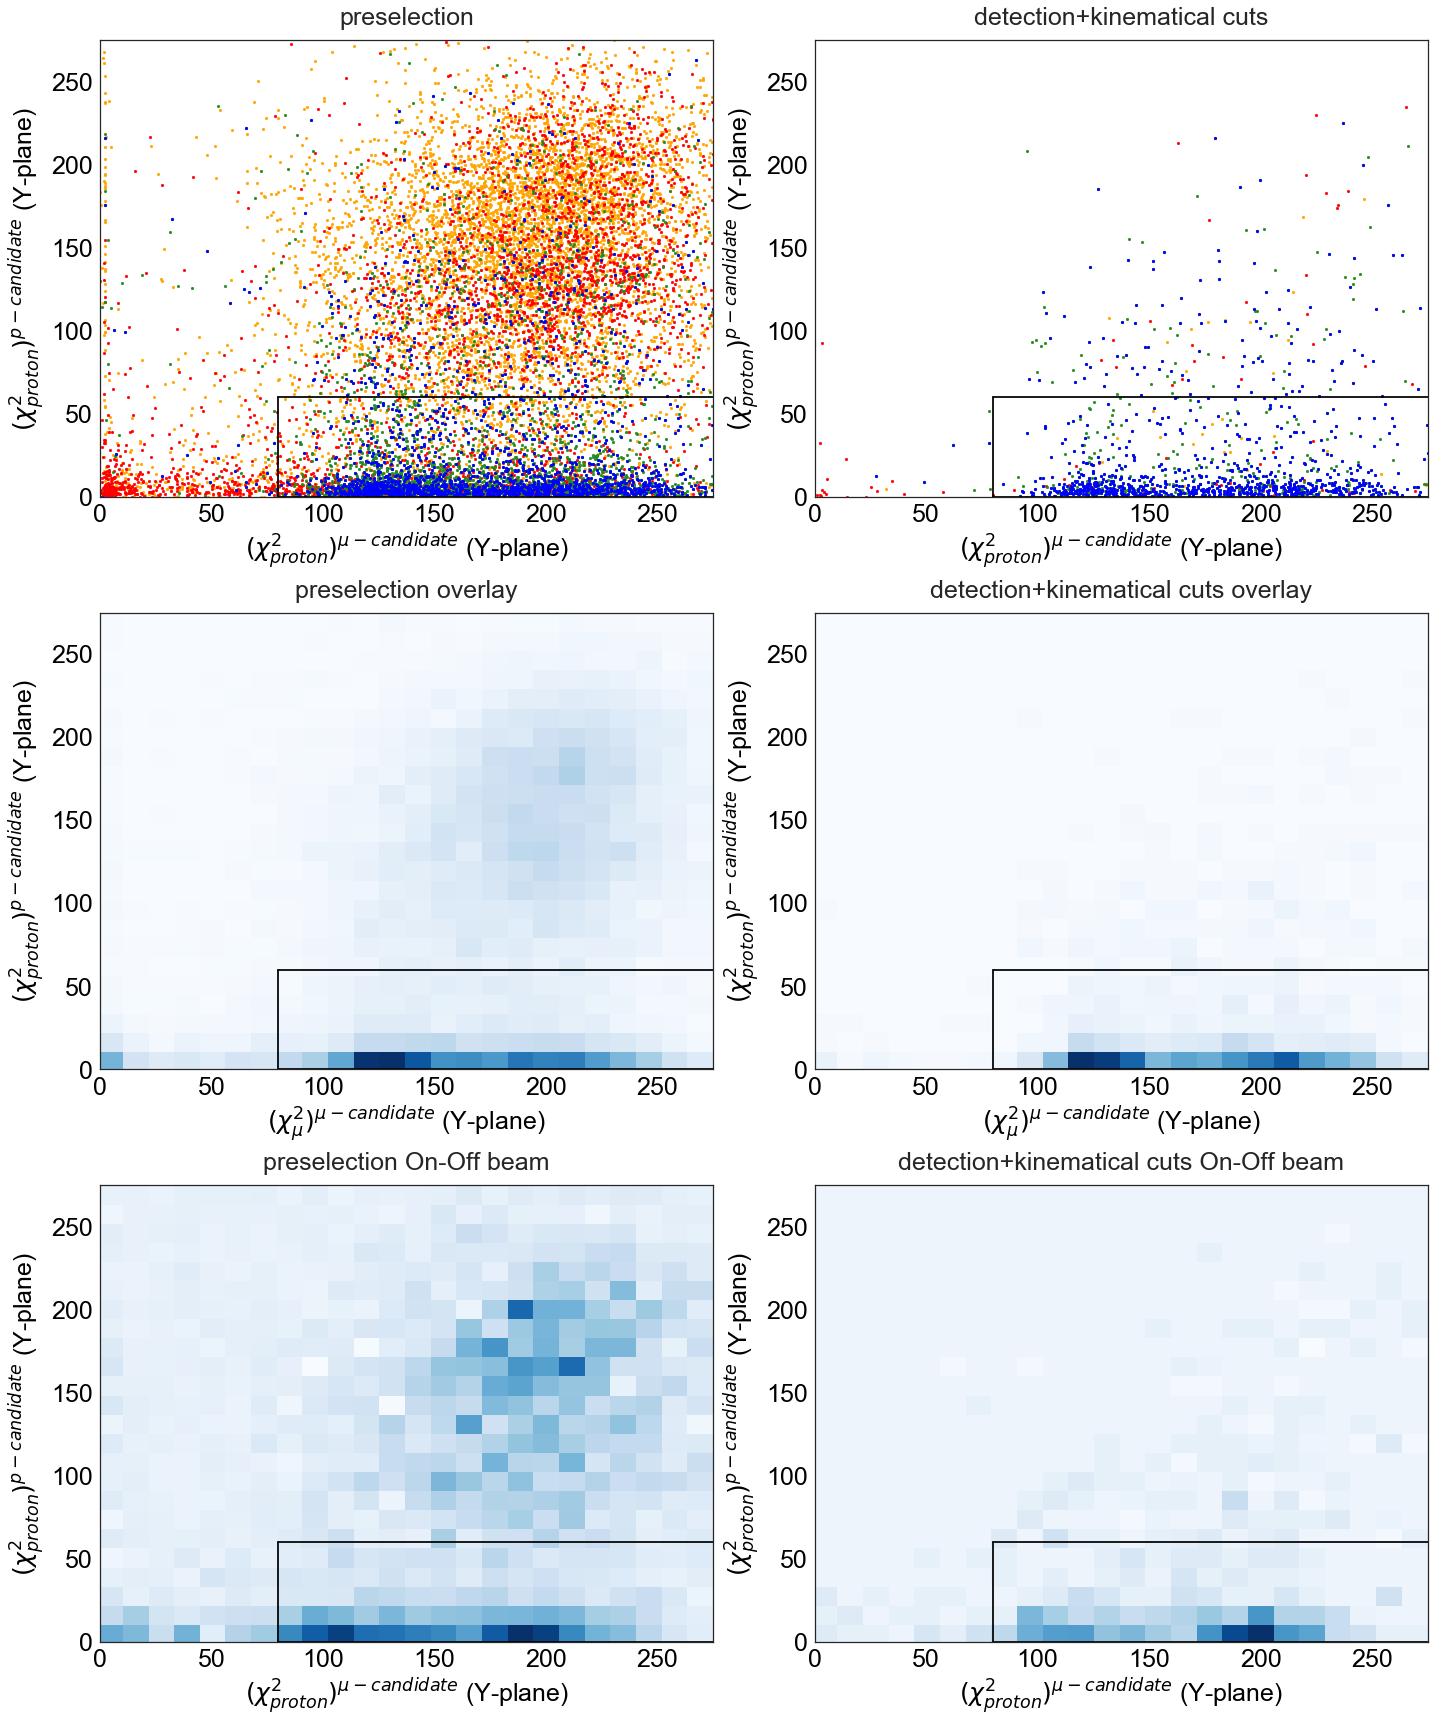

In [58]:
bins = (linspace(-1,275,25),linspace(-1,275,25))
varx,vary =  'pidcali_Chi2ProtonYplane_muCandidate','pidcali_Chi2ProtonYplane_pCandidate'
xcut = (Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_max)
ycut = (Chi2Proton_pCandidate_min,Chi2Proton_pCandidate_max)

fig=plt.figure(figsize=(20,24))
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','soft Pt']
                                               ,['preselection','detection+kinematical cuts'])):
    ax = fig.add_subplot(3,2,icut+1)

    overlay = reducedOverlay[cut_name]
    for sample,color in zip([overlay['cosmic'],overlay['other pairs'],overlay['1mu-1p'],overlay['CC 1p 0pi']]
                            ,['orange','red','forestgreen','blue']):
        sample = sample[(sample[varx]!=0)&(sample[vary]!=0)]
        plt.scatter(sample[varx],sample[vary],color=color,s=8)
    set_axes(ax,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins)),ylim=(0,np.max(bins))
             ,title=cut_label)
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')
    
    ax = fig.add_subplot(3,2,icut+3)
    overlay_all = pd.concat([overlay['cosmic'],overlay['other pairs'],overlay['1mu-1p']])
    overlay_all = overlay_all[(overlay_all[varx]!=0)&(overlay_all[vary]!=0)]
    h_T,xedges, yedges = np.histogram2d( overlay_all[varx] , overlay_all[vary] , bins=bins )    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_T) , np.max(h_T)
    pcmesh = ax.pcolormesh(X, Y, h_T.T ,cmap='Blues')
    set_axes(ax,x_label=r'$(\chi^2_{\mu})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins[0])),ylim=(0,np.max(bins[1]))
             ,title=cut_label+' overlay')    
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')


    
    ax = fig.add_subplot(3,2,icut+5)
    OnBeamSample = reducedOnBeam[cut_name] 
    OnBeamSample = OnBeamSample[(OnBeamSample[varx]!=0)&(OnBeamSample[vary]!=0)]
    OffBeamSample = reducedOffBeam[cut_name] 
    OffBeamSample = OffBeamSample[(OffBeamSample[varx]!=0)&(OffBeamSample[vary]!=0)]

    h_OnBeam_T,xedges, yedges = np.histogram2d( OnBeamSample[varx] , OnBeamSample[vary] , bins=bins )
    h_OffBeam_T,xedges, yedges = np.histogram2d( OffBeamSample[varx] , OffBeamSample[vary] , bins=bins )
    
    h_OnBeam_minus_OffBeam_T = h_OnBeam_T - OffBeam_scaling*h_OffBeam_T
    h_OnBeam_minus_OffBeam = h_OnBeam_minus_OffBeam_T.T
    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_OnBeam_minus_OffBeam) , np.max(h_OnBeam_minus_OffBeam)
    pcmesh = ax.pcolormesh(X, Y, h_OnBeam_minus_OffBeam ,cmap='Blues'
                          )
    set_axes(ax,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins)),ylim=(0,np.max(bins))
             ,title=cut_label+' On-Off beam')
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')

    
plt.tight_layout()

# what happens if we apply a cut on $\chi^2_{proton}$?

In [7]:
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,pureffOverlayNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
flash,93.6%,36.1%,93.0%,17.0%,flash,93.6% (4743),95.1% (4149),43.9% (4253),93.0% (2236)
length,72.6%,51.3%,75.5%,25.3%,length,72.6% (3681),45.0% (1965),15.8% (1530),75.5% (1815)
non-collinearity,65.7%,65.9%,71.0%,33.8%,non-collinearity,65.7% (3331),28.3% (1237),5.0% (487),71.0% (1708)
vertex activity,44.7%,68.4%,60.7%,44.1%,vertex activity,44.7% (2267),18.1% (791),2.6% (255),60.7% (1460)
delta phi,30.3%,87.2%,47.3%,64.5%,delta phi,30.3% (1536),3.7% (161),0.7% (65),47.3% (1136)
soft Pt,26.8%,90.8%,43.4%,69.8%,soft Pt,26.8% (1358),2.1% (93),0.5% (44),43.4% (1044)


In [33]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (9692) & 100.0% (2404) & 12.6%\tabularnewline
\hline
flash & 43.9% (4253) & 93.0% (2236) & 17.0%\tabularnewline
\hline
length & 15.8% (1530) & 75.5% (1815) & 25.3%\tabularnewline
\hline
non-collinearity & 5.0% (487) & 71.0% (1708) & 33.8%\tabularnewline
\hline
vertex activity & 2.6% (255) & 60.7% (1460) & 44.1%\tabularnewline
\hline
delta phi & 0.7% (65) & 47.3% (1136) & 64.5%\tabularnewline
\hline
soft Pt & 0.5% (44) & 43.4% (1044) & 69.8%\tabularnewline
\hline


In [34]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection',r'$PID_{a}^{proton-candidate}$','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
PIDa,65.4%,54.1%,68.1%,26.7%,PIDa,65.4% (3316),34.6% (1511),13.4% (1301),68.1% (1637)
flash,61.3%,59.7%,63.6%,29.4%,flash,61.3% (3106),33.8% (1474),6.5% (626),63.6% (1530)
length,54.7%,68.0%,57.8%,34.1%,length,54.7% (2771),20.1% (875),4.4% (429),57.8% (1389)
non-collinearity,49.6%,75.2%,54.5%,39.3%,non-collinearity,49.6% (2512),14.5% (631),2.0% (197),54.5% (1311)
vertex activity,34.5%,78.2%,47.4%,50.9%,vertex activity,34.5% (1751),9.1% (398),0.9% (90),47.4% (1139)
delta phi,23.0%,91.5%,36.5%,69.0%,delta phi,23.0% (1165),1.9% (85),0.2% (23),36.5% (878)
soft Pt,20.1%,93.2%,33.3%,73.4%,soft Pt,20.1% (1018),1.3% (57),0.2% (17),33.3% (801)


In [36]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (9692) & 100.0% (2404) & 12.6%\tabularnewline
\hline
PIDa & 13.4% (1301) & 68.1% (1637) & 26.7%\tabularnewline
\hline
flash & 6.5% (626) & 63.6% (1530) & 29.4%\tabularnewline
\hline
length & 4.4% (429) & 57.8% (1389) & 34.1%\tabularnewline
\hline
non-collinearity & 2.0% (197) & 54.5% (1311) & 39.3%\tabularnewline
\hline
vertex activity & 0.9% (90) & 47.4% (1139) & 50.9%\tabularnewline
\hline
delta phi & 0.2% (23) & 36.5% (878) & 69.0%\tabularnewline
\hline
soft Pt & 0.2% (17) & 33.3% (801) & 73.4%\tabularnewline
\hline


In [38]:
cuts_order  = ['no cut','Chi2Proton','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection',r'$\chi^{2}_{proton-assumption}$','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order
                                                       ,Chi2Proton_muCandidate_min=100,Chi2Proton_muCandidate_max=np.inf
                                                       ,Chi2Proton_pCandidate_min=0,Chi2Proton_pCandidate_max=60)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
Chi2Proton,70.0%,67.1%,74.2%,33.7%,Chi2Proton,70.0% (3547),20.1% (879),8.9% (864),74.2% (1784)
flash,65.5%,72.0%,69.2%,36.0%,flash,65.5% (3322),19.7% (858),4.5% (436),69.2% (1664)
length,59.0%,77.5%,63.4%,39.5%,length,59.0% (2993),11.9% (518),3.6% (350),63.4% (1524)
non-collinearity,53.6%,83.5%,60.1%,44.4%,non-collinearity,53.6% (2716),9.0% (391),1.5% (146),60.1% (1445)
vertex activity,37.1%,85.5%,51.6%,56.3%,vertex activity,37.1% (1883),5.7% (247),0.8% (73),51.6% (1240)
delta phi,25.3%,93.6%,40.4%,70.9%,delta phi,25.3% (1282),1.4% (61),0.3% (27),40.4% (971)
soft Pt,22.4%,95.0%,37.1%,74.8%,soft Pt,22.4% (1133),0.9% (40),0.2% (20),37.1% (892)


In [39]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (9692) & 100.0% (2404) & 12.6%\tabularnewline
\hline
Chi2Proton & 8.9% (864) & 74.2% (1784) & 33.7%\tabularnewline
\hline
flash & 4.5% (436) & 69.2% (1664) & 36.0%\tabularnewline
\hline
length & 3.6% (350) & 63.4% (1524) & 39.5%\tabularnewline
\hline
non-collinearity & 1.5% (146) & 60.1% (1445) & 44.4%\tabularnewline
\hline
vertex activity & 0.8% (73) & 51.6% (1240) & 56.3%\tabularnewline
\hline
delta phi & 0.3% (27) & 40.4% (971) & 70.9%\tabularnewline
\hline
soft Pt & 0.2% (20) & 37.1% (892) & 74.8%\tabularnewline
\hline


(array([  2.72111763e+02,   8.50000000e+01,   2.91747894e+01,
          2.31747894e+01,   2.31747894e+01,   1.63495787e+01,
          8.17478936e+00,   1.10558814e+01,   7.17478936e+00,
          7.58739468e+00,   5.87394680e-01,  -2.37815961e-01,
          1.17478936e+00,   4.46848670e+00,  -1.18907980e-01,
          1.88109202e+00,   3.29369734e+00,  -7.06302660e-01,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([ 445.65380665,   74.38194976,   42.43725088,   33.10124389,
          20.16034473,   24.70593086,   18.23065067,   16.53613011,
           9.83533765,    7.68013132,    7.68013132,    5.28009029,
           5.02559434,    4.07523915,    3.59523095,    4.07523915,
           3.11522274,    0.        ,    0.        ,    0.7151817 ,
           0.48000821,    0.        ,    0.7151817 ,    0.        ,    0.        ]))

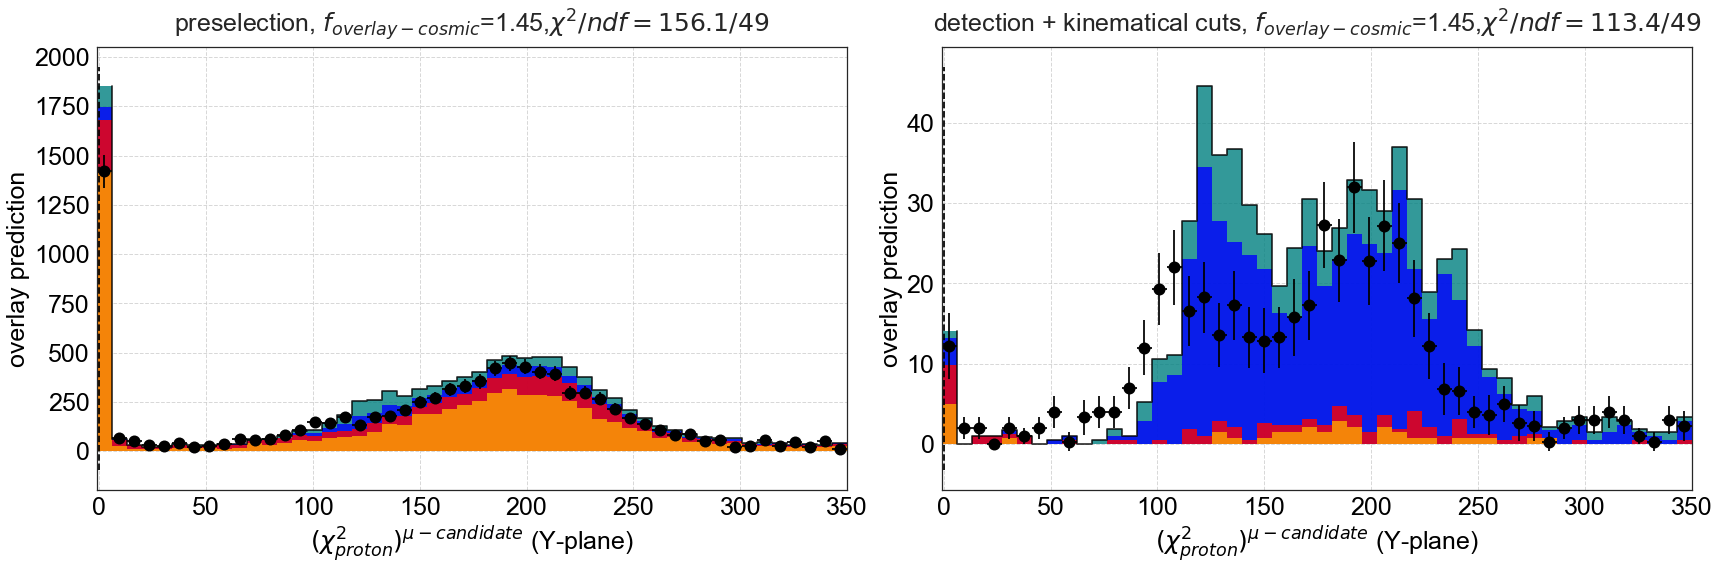

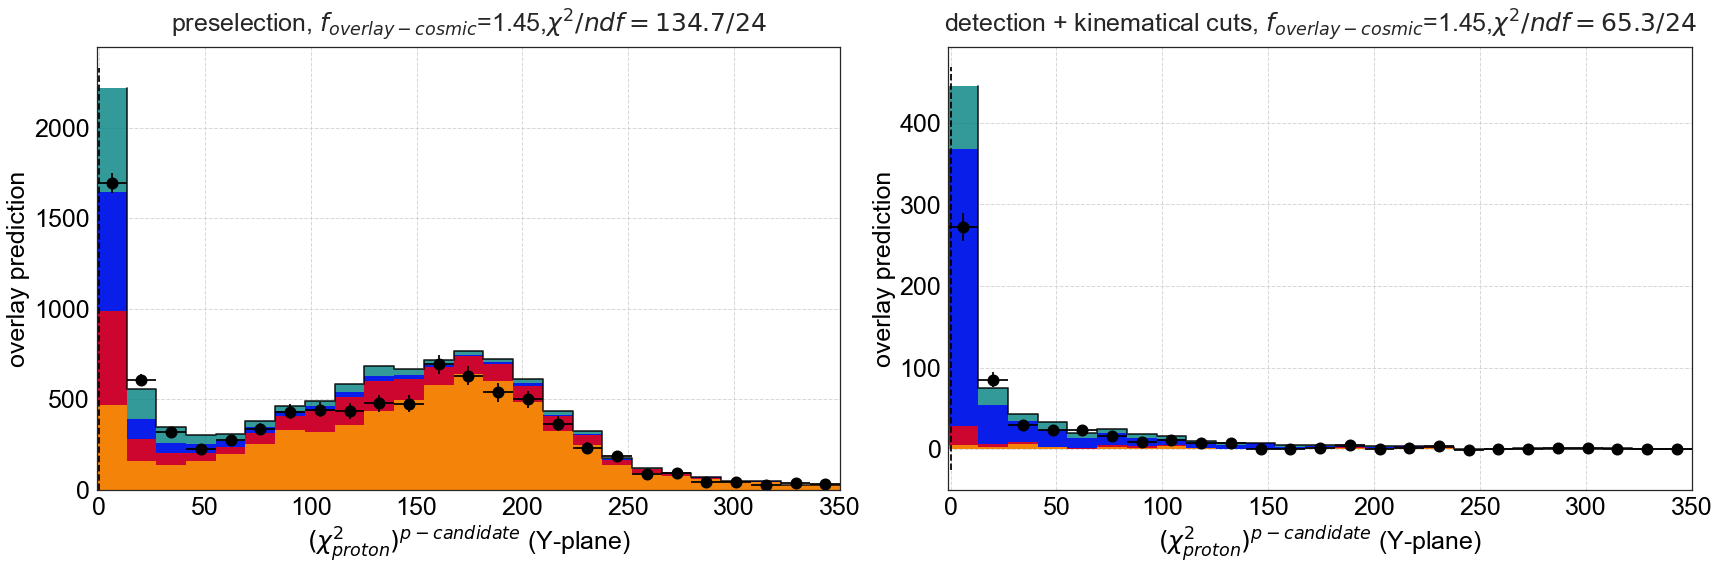

In [67]:
plot_OnOff_nocut_finalcut(var='pidcali_Chi2ProtonYplane_muCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)',bins=linspace(-1,350,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(-1,350)
                                       ,chi2_xrange=(0,300));

plot_OnOff_nocut_finalcut(var='pidcali_Chi2ProtonYplane_pCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)',bins=linspace(-1,350,26)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(-1,350)
                                       ,chi2_xrange=(0,300));

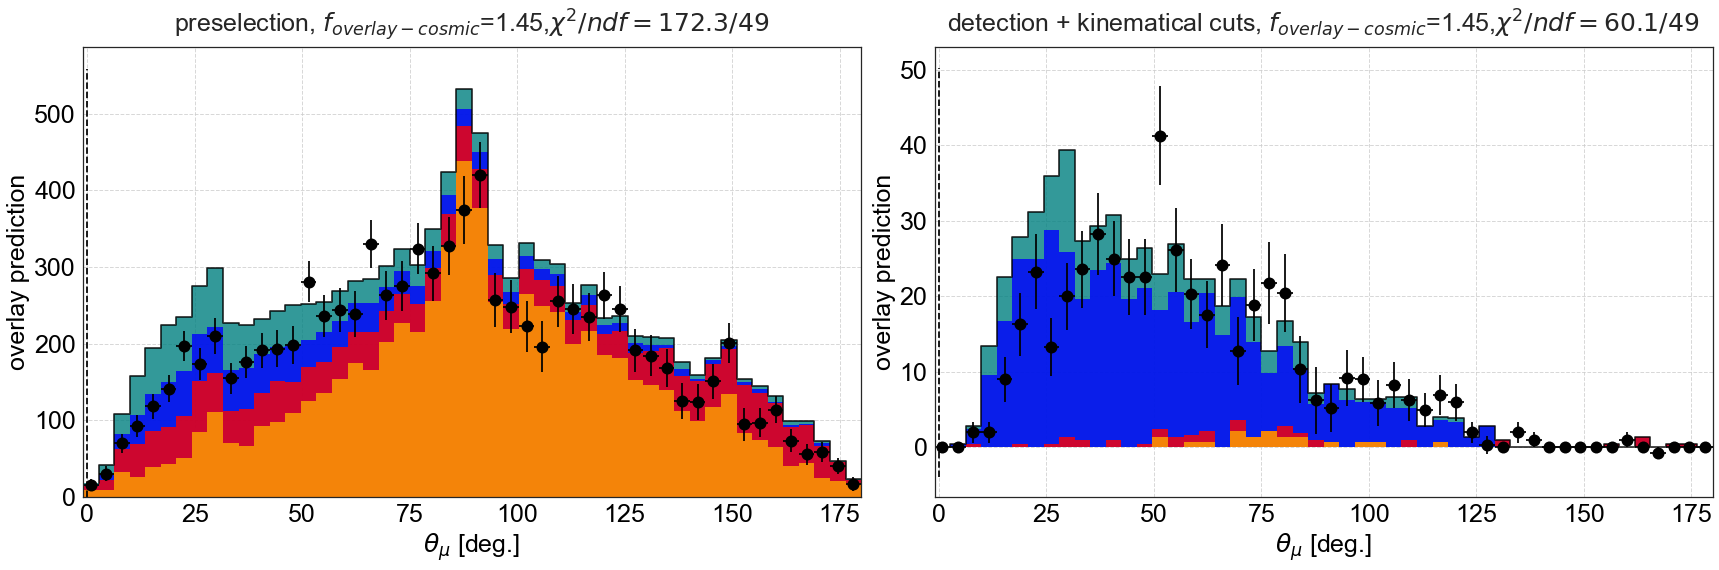

In [44]:
plot_OnOff_nocut_finalcut(var='reco_Pmu_theta',mul=180./np.pi
                                       ,x_label= r'$\theta_\mu$ [deg.]',bins=linspace(-1,180,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic
                          ,f_Cosmic=f_OverlayCosmic,f_CosmicName=r'$f_{overlay-cosmic}$'
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(-1,180)
                                       ,chi2_xrange=(0,180));



In [41]:

# ------------------------------------------------
# April-29, 2018
def plot_OnOff_nocut_finalcut(var='theta_12',mul=1,x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                              ,scaling_name='only POT'
                              ,color ='black',x_ticks=None
                              ,figsize=(24,8)
                              ,overlay_scalings=None,do_OffBeam=False
                              ,reducedOffBeam=None,reducedOnBeam=None,reducedOverlay=None
                              ,f_Cosmic=None,f_CosmicName=r'$f_{cosmic}$'
                              ,chi2_xrange=None,xlim=None
                              ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                              ,debug=0
                              ,do_show_cut=True,x_varcut=(0,np.inf)
                              ,do_only_preselection=False
                              ):
    fig = plt.figure(figsize=figsize)
    
    for i_cut,(cut_name,cut_label) in enumerate(zip(['no cut',last_cut_name]
                                                    ,['preselection',last_cut_label])):#{
        
        ax = fig.add_subplot(1,1 if do_only_preselection else 2 ,i_cut + 1)
        
        h_OnOff,h_OnOff_err = OnBeam_OffBeam( OnBeamSample=reducedOnBeam[cut_name] , OffBeamSample=reducedOffBeam[cut_name] , debug=debug
                                             , var=var , x_label=x_label , bins=bins, mul=mul
                                             , ax=ax, color=color
                                             , doOffBeam_scaling=True
                                             , OriginalOnBeamSample=reducedOnBeam['no cut'] , OriginalOffBeamSample=reducedOffBeam['no cut']
                                             )
            
        h_stack,_=plot_stacked_MCsamples(reducedOverlay = reducedOverlay,mul=mul
                                                                              , debug=0
                                                                              , overlay_scaling=overlay_scalings[scaling_name]
                                                                              , cut_name=cut_name
                                                                              , var=var, x_label=x_label, y_label='overlay prediction',xlim=xlim
                                                                              , bins=bins , alpha=0.8, ax=ax
                                                                              , do_add_legend=False
                                                                              );

        chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                                                              , h1=h_OnOff , h2=h_stack
                                                                              , h1err=h_OnOff_err, h2err=np.sqrt(h_stack)
                                                                              , debug=0 )
        chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
        ax.set_title(cut_label+(', '+f_CosmicName+'=%.2f'%f_Cosmic if f_Cosmic is not None else '') + ',' + chi2_txt
                                                          ,y=1.02,fontsize=25)

        if do_show_cut:
            plt.plot([x_varcut[0],x_varcut[0]],ax.get_ylim(),'--',[x_varcut[1],x_varcut[1]],ax.get_ylim(),'--',color='black')
        if debug: print cut_label,': sum of h_OnOff:',np.sum(h_OnOff),',sum of h_stack:',np.sum(h_stack)
    
        if do_only_preselection and i_cut==0: return

    #}
    plt.tight_layout()
    return h_OnOff,h_stack
# ------------------------------------------------


def OnBeam_OffBeam( OnBeamSample=None , OffBeamSample=None , debug=0,mul=1
                   , var='PIDa_assigned_proton' , x_label=r'$PID_a^p$' , y_label='counts'
                   , bins=np.linspace(0,30,31)
                   , ax=None, figsize=(14,6),fontsize=25
                   , color=OnBeamColor
                   , doOffBeam_scaling=True
                   , OriginalOnBeamSample=None , OriginalOffBeamSample=None
                   , remove_ticks_x=False, remove_ticks_y=False):
    bin_width = bins[1]-bins[0]
    mid = 0.5*(bins[:-1]+bins[1:])
    
    
    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    h_OnBeam,edges = np.histogram( mul*OnBeamSample[var] , bins=bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    h_OffBeam,edges = np.histogram( mul*OffBeamSample[var] , bins=bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    
    if doOffBeam_scaling==True:#{
        h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
        h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + OffBeam_scaling*OffBeam_scaling*h_OffBeam) )
        Integral = len(OnBeamSample) - OffBeam_scaling*len(OffBeamSample)
        Integral_Original = len(OriginalOnBeamSample) - OffBeam_scaling*len(OriginalOffBeamSample)
    #}
    else:#{
        h_OnBeam_minus_OffBeam = h_OnBeam - h_OffBeam
        h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + h_OffBeam) )
        Integral = len(OnBeamSample) - len(OffBeamSample)
        Integral_Original = len(OriginalOnBeamSample) - len(OriginalOffBeamSample)
    #}
    
    
    plt.errorbar( x=mid, xerr=bin_width/2., markersize=12
                 , y=h_OnBeam_minus_OffBeam , yerr=h_OnBeam_minus_OffBeam_err
                 , fmt='o', color=color , ecolor='black'
                 , label=r'(On-Off) Beam ($\int=$%.1f=%.1f'%(Integral,100*Integral/Integral_Original)+'%)'
                 )
    if debug>1: print "OnBeam-OffBeam (bins[:-1]):\n",bins[:-1]
    plt.plot([np.min(ax.get_xlim()),np.min(ax.get_xlim())],[0,0],'--',color='black',linewidth=2)
    
    set_axes(ax,x_label=x_label,y_label=y_label,do_add_grid=True,fontsize=fontsize
             ,xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width)
             ,remove_ticks_x=remove_ticks_x, remove_ticks_y=remove_ticks_y
             )
    plt.tight_layout()
    return h_OnBeam_minus_OffBeam,h_OnBeam_minus_OffBeam_err
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -



# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Nov-20,2017 (last editted April-26, 2018)
def plot_stacked_MCsamples( reducedOverlay=None,mul=1
                           , ax=None, debug=0,overlay_scaling=None,cut_name='no cut'
                           , MC_scaling=Nevents['f(POT)']
                           , var=None, x_label='',y_label='', bins=None , alpha=0.8, fontsize=25
                           , remove_ticks_x=False, remove_ticks_y=False 
                           , xlim=None
                           , do_add_legend=False
                           , do_individual_histograms=True
                           , stackColor='black',stackLabel='overlay'):
    '''
    return: h, bins
            stacked histogram values and bins,
            of the samples from the overlay: 
            (cosmic, other-pairs) + 1mu 1p pairs
    '''
    bin_width = bins[1]-bins[0]
    mid = 0.5*(bins[:-1]+bins[1:])
    h,labels,colors,N = dict(),dict(),dict(),dict()
    
    for i_pair_type,pair_type in enumerate(pair_types):
        sample = reducedOverlay[cut_name][pair_type]
        N[pair_type] = float(len(sample))
        Noriginal = len(reducedOverlay['no cut'][pair_type])
        labels[pair_type] = MClabels[i_pair_type]+' (%.1f=%.1f'%(N[pair_type],100.*N[pair_type]/Noriginal)+'%)'
        colors[pair_type] = MCcolors[i_pair_type];
        x = mul*sample[var]; x = x[x<1e5];
        h[pair_type],edges = np.histogram(x,bins=bins)
        h[pair_type+' scaled'] = overlay_scaling[pair_type]*h[pair_type]
    # -- - - - --------- - - -- ---- -  - --- -- -- -- --
    if do_individual_histograms:#{

        # mu-p
        plt.bar(mid,h['cosmic scaled']+h['other pairs scaled']+h['1mu-1p scaled'] , width=bin_width
            ,color=colors['1mu-1p'],alpha=alpha, label=labels['1mu-1p'])
        # CC 1p 0pi
        plt.bar(mid,h['cosmic scaled']+h['other pairs scaled']+h['CC 1p 0pi scaled'] , width=bin_width
                ,color=colors['CC 1p 0pi'],alpha=alpha, label=labels['CC 1p 0pi'])
        # other pairs
        plt.bar(mid,h['cosmic scaled']+h['other pairs scaled'] , width=bin_width
                        ,color=colors['other pairs'],alpha=alpha , label=labels['other pairs'])
                        # cosmic
        plt.bar(mid, h['cosmic scaled'] , width=bin_width
                        ,color=colors['cosmic'],alpha=alpha, label=labels['cosmic'])
    #}
    # all
    h_stack = h['cosmic scaled']+h['other pairs scaled']+h['1mu-1p scaled']
    plt.step(mid+0.5*bin_width,h_stack ,color=stackColor,alpha=alpha, label=stackLabel)

    if np.max(h_stack)>np.max(ax.get_ylim()): ax.set_ylim(np.min(ax.get_ylim()),1.05*np.max(h_stack))
    set_axes(ax,x_label=x_label,y_label=y_label,do_add_grid=True,fontsize=fontsize          
             ,xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width) if xlim is None else xlim
             ,remove_ticks_x=remove_ticks_x             
             ,remove_ticks_y=remove_ticks_y                 
            )    
    return h_stack , bins
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -



# 2d $\chi^2_{p}$ of the proton vs. $\chi^2_{\mu}$ of the muon candidate

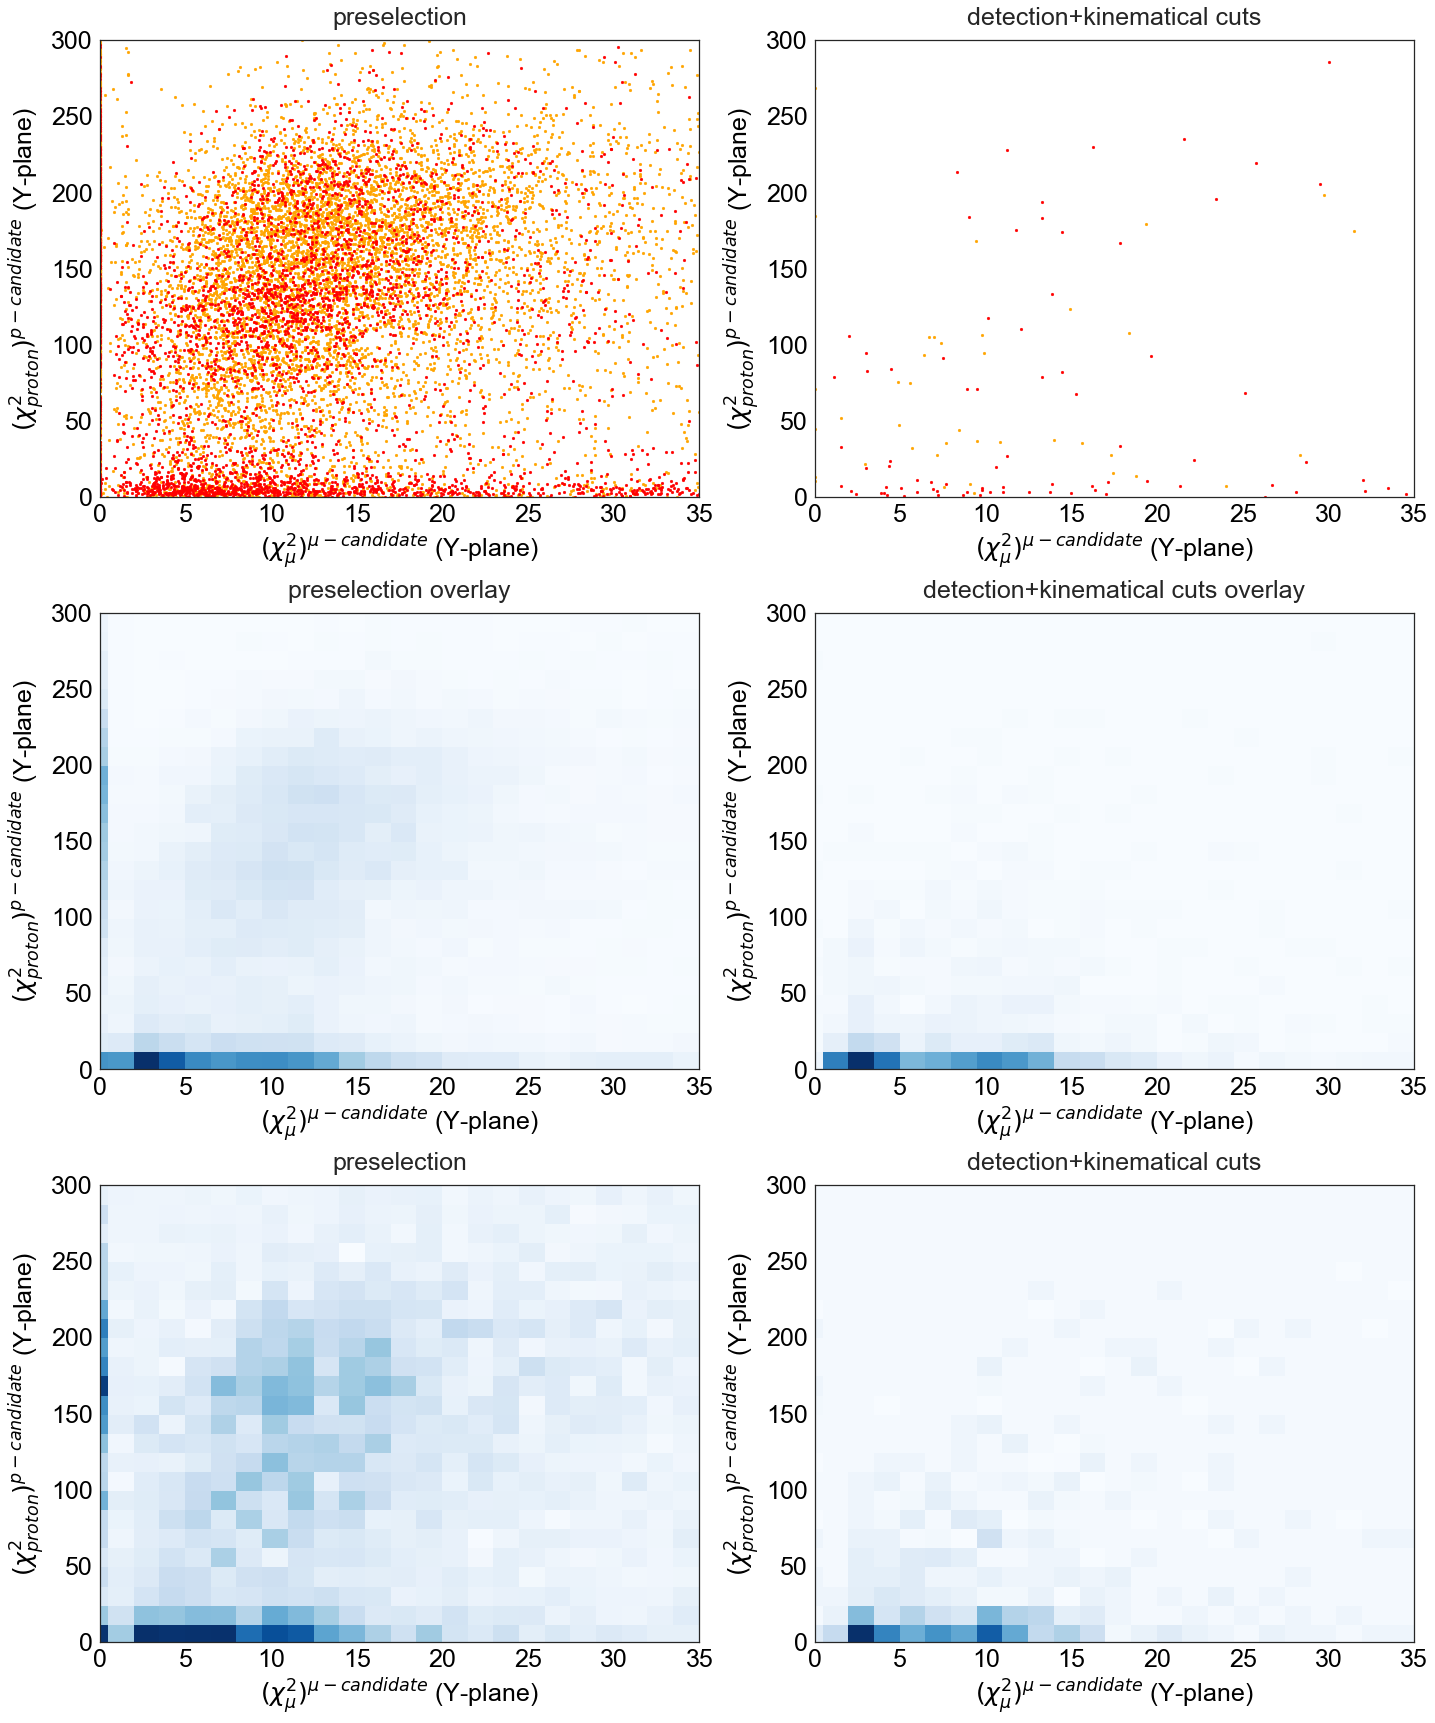

In [11]:
bins = (linspace(-1,35,25),linspace(-1,300,25))
varx,vary =  'pidcali_Chi2MuonYplane_muCandidate','pidcali_Chi2ProtonYplane_pCandidate'


fig=plt.figure(figsize=(20,24))
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','soft Pt']
                                               ,['preselection','detection+kinematical cuts'])):
    ax = fig.add_subplot(3,2,icut+1)

    overlay = reducedOverlay[cut_name]
    for sample,color in zip([overlay['cosmic'],overlay['other pairs']]#,overlay['1mu-1p'],overlay['CC 1p 0pi']]
                            ,['orange','red','forestgreen','blue']):
        plt.scatter(sample[varx],sample[vary],color=color,s=8)
    set_axes(ax,x_label=r'$(\chi^2_{\mu})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins[0])),ylim=(0,np.max(bins[1]))
             ,title=cut_label)
    
    ax = fig.add_subplot(3,2,icut+3)
    overlay_all = pd.concat([overlay['cosmic'],overlay['other pairs'],overlay['1mu-1p']])
    h_T,xedges, yedges = np.histogram2d( overlay_all[varx] , overlay_all[vary] , bins=bins )    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_T) , np.max(h_T)
    pcmesh = ax.pcolormesh(X, Y, h_T.T ,cmap='Blues')
    set_axes(ax,x_label=r'$(\chi^2_{\mu})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins[0])),ylim=(0,np.max(bins[1]))
             ,title=cut_label+' overlay')    

    
    ax = fig.add_subplot(3,2,icut+5)
    OnBeamSample = reducedOnBeam[cut_name] 
    OffBeamSample = reducedOffBeam[cut_name] 
    h_OnBeam_T,xedges, yedges = np.histogram2d( OnBeamSample[varx] , OnBeamSample[vary] , bins=bins )
    h_OffBeam_T,xedges, yedges = np.histogram2d( OffBeamSample[varx] , OffBeamSample[vary] , bins=bins )
    
    h_OnBeam_minus_OffBeam_T = h_OnBeam_T - OffBeam_scaling*h_OffBeam_T
    h_OnBeam_minus_OffBeam = h_OnBeam_minus_OffBeam_T.T
    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_OnBeam_minus_OffBeam) , np.max(h_OnBeam_minus_OffBeam)
    pcmesh = ax.pcolormesh(X, Y, h_OnBeam_minus_OffBeam ,cmap='Blues')
    set_axes(ax,x_label=r'$(\chi^2_{\mu})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins[0])),ylim=(0,np.max(bins[1]))
             ,title=cut_label)
    
plt.tight_layout()